In [66]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df=pd.read_csv("blood.csv")
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,99,1
1,0,13,3250,28,1
2,1,17,4000,36,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [69]:
df.describe()

,Recency,Frequency,Monetary,Time,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.516043,1378.676471,34.284759,0.237968
std,8.095396,5.841825,1459.826781,24.380307,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,99.000000,1.000000


CHECK FOR MISSING VALUES

In [70]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

df EXPLORATION


In [71]:
#distribution of numerical features and categorical features
numerical_features =df.select_dtypes(include=[  'int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=[ 'object']).columns.tolist()



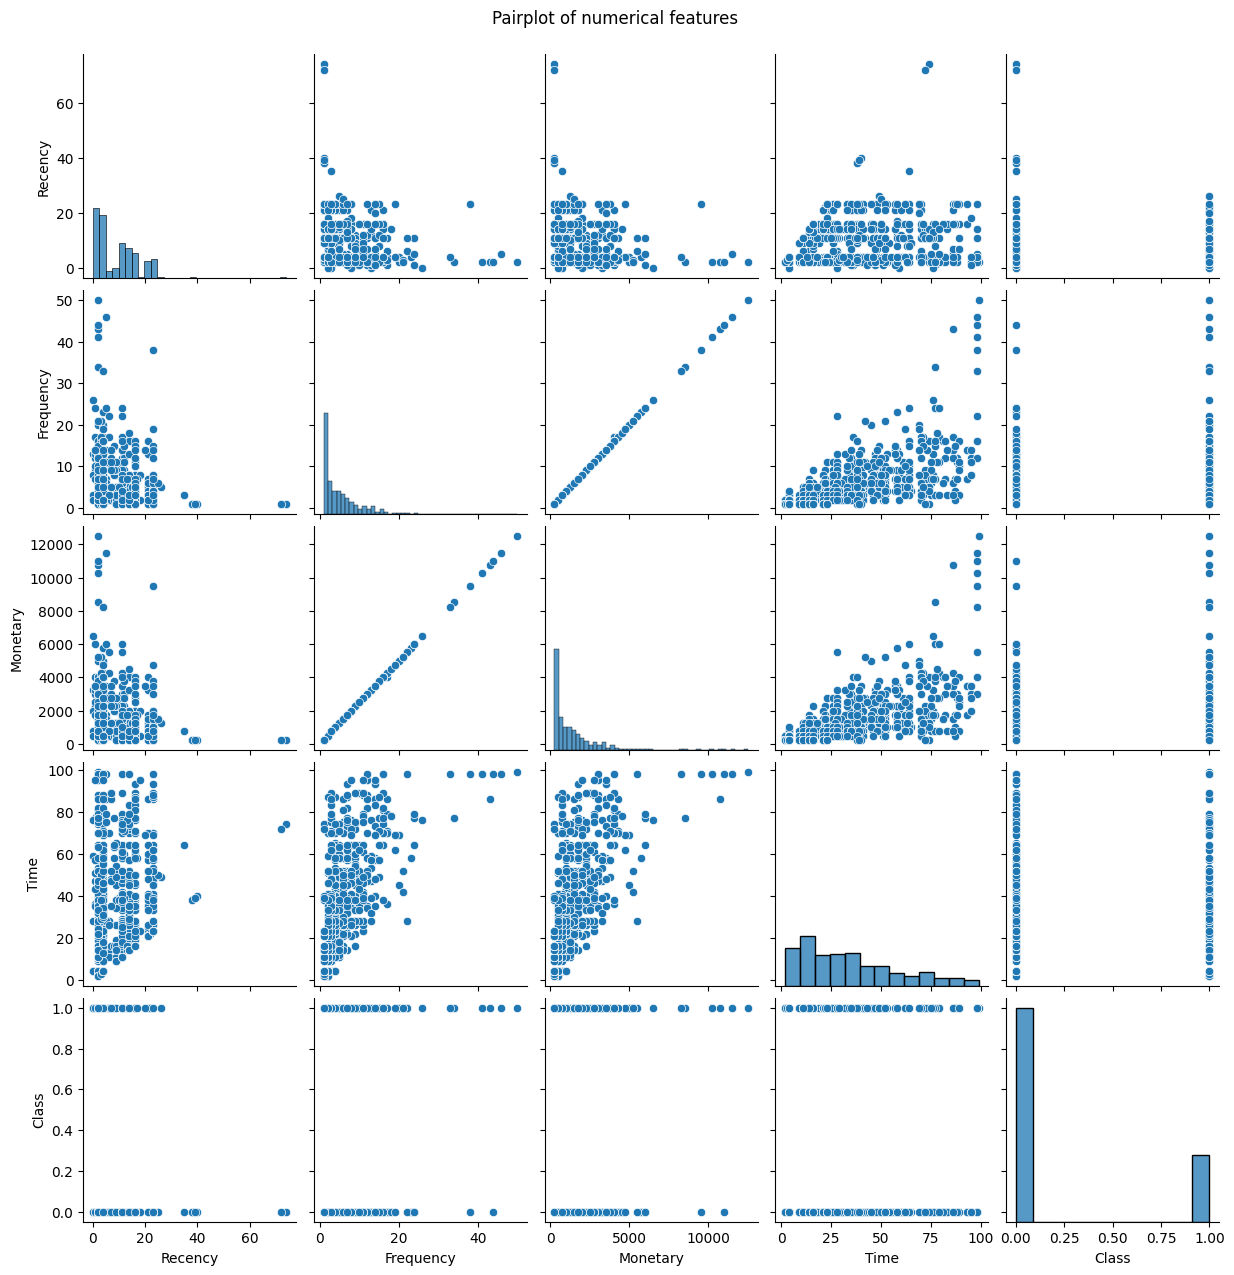

In [72]:
#pairplot for numerical features
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of numerical features",y=1.02)
plt.show()

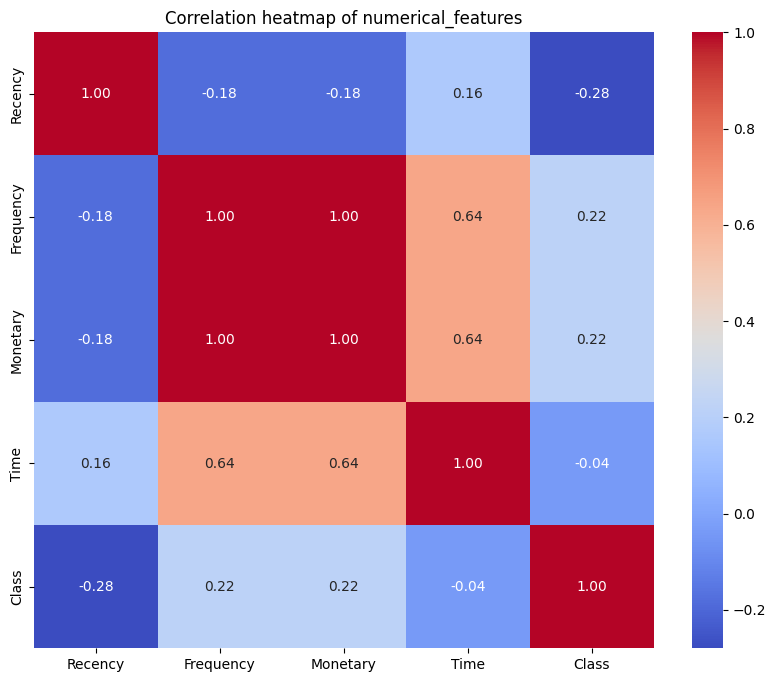

In [73]:
#correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix=df[numerical_features].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation heatmap of numerical_features")
plt.show()


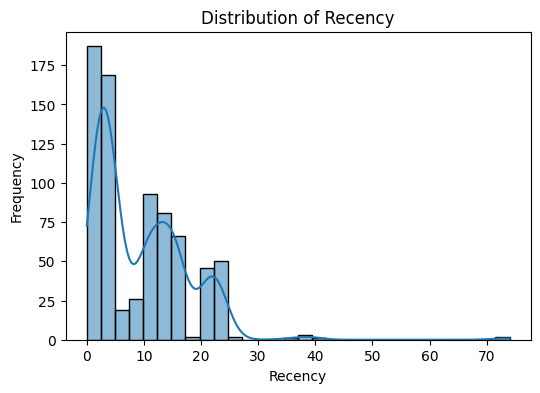

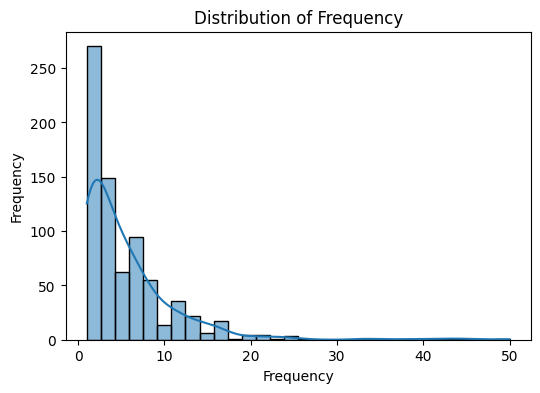

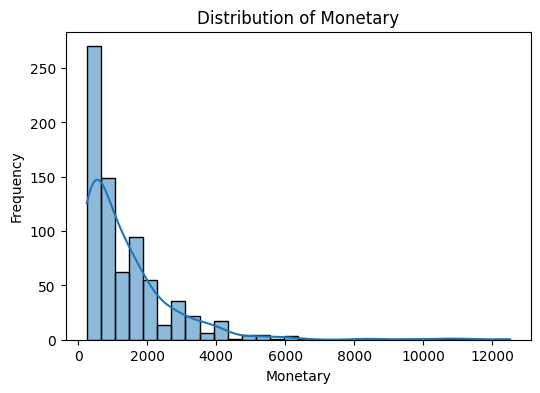

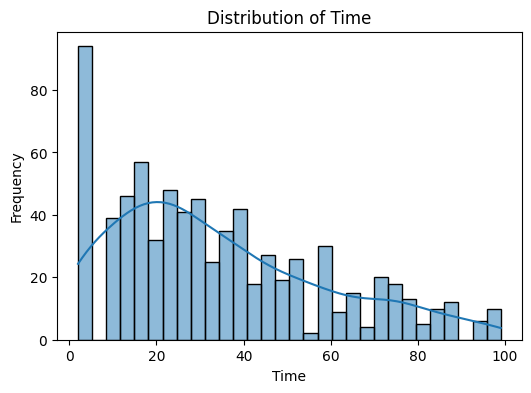

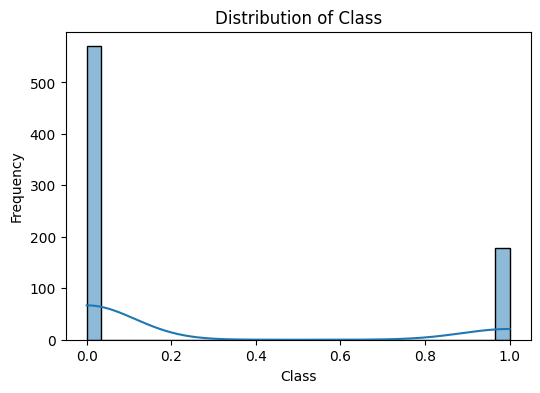

In [74]:
# Distribution plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [75]:
# Check if 'recommendation' exists in the dfset
if 'recommendation' not in df.columns:
    print("Column 'recommendation' not found. Creating a mock column for testing.")
    df['recommendation'] = np.random.choice([0, 1, 2, 3], size=len(df))

# Separate features (X) and target (y)
X = df.drop('recommendation', axis=1)
y = df['recommendation']


Column 'recommendation' not found. Creating a mock column for testing.


In [76]:
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class', 'recommendation'], dtype='object')

In [77]:

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [78]:

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])


In [79]:
# Train the model
model_pipeline.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]

In [86]:
# Step 4: Data Preprocessing
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

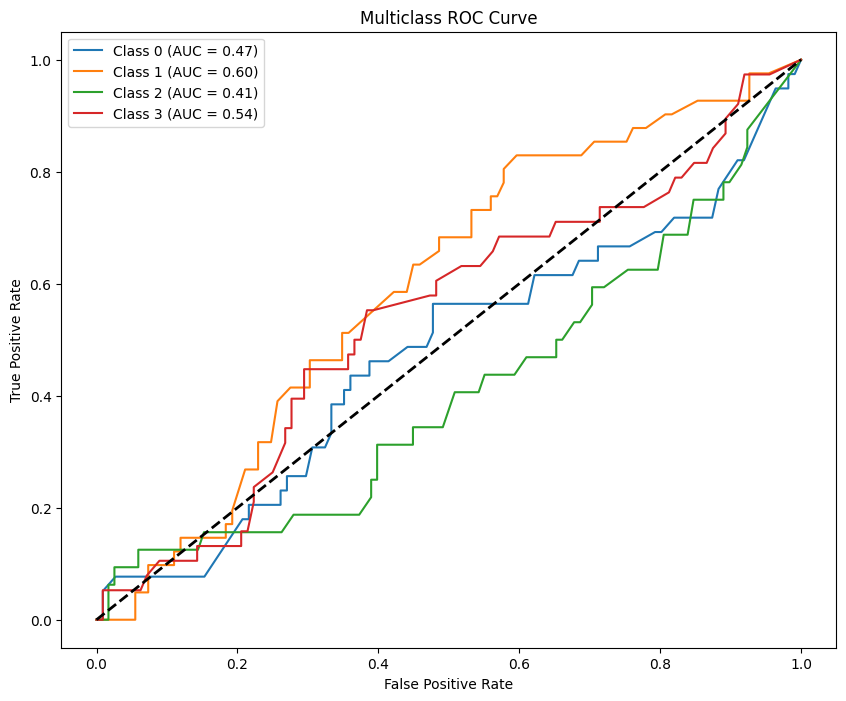

In [87]:

# Preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [88]:

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Model Pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [89]:

# Train the model
model_pipeline.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]


ValueError: A given column is not a column of the dataframe